In [1]:
cd

In [2]:
cd /Users/jjobes/Desktop/Springboard/second-capstone

In [3]:
ls

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [5]:
pre_pros_df = pd.read_csv('EDA_second_capstone.csv')
pre_pros_df.shape

(199940, 88)

In [6]:
pre_pros_df.head()

,Loan ID,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,last_fico_range,credit_maturity
0,1775844,6075.0,36 months,18.55,221.31,D,D2,Store Manager,6 years,MORTGAGE,34000.0,Verified,Nov-2013,Fully Paid,debt_consolidation,OK,31.38,0.0,689.0,0.0,0.0,104.0,10.0,1.0,65.1,21.0,f,1.0,0.0,Individual,0.0,34.0,89647.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9300.0,0.0,0.0,0.0,4.0,8965.0,2555.0,69.9,0.0,0.0,146.0,128.0,28.0,13.0,1.0,28.0,0.0,9.0,0.0,0.0,6.0,7.0,6.0,9.0,10.0,7.0,10.0,7.0,10.0,0.0,0.0,0.0,0.0,100.0,83.3,1.0,0.0,108242.0,28003.0,8500.0,32815.0,N,4.0,7072
1,122162,1850.0,36 months,19.19,68.00,E,E3,Uknown,Uknown,RENT,11652.0,Verified,Oct-2015,Fully Paid,other,MN,7.72,0.0,689.0,0.0,50.0,0.0,5.0,0.0,15.6,11.0,w,0.0,50.0,Individual,0.0,1043.0,422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2700.0,0.0,0.0,0.0,3.0,84.0,0.0,0.0,0.0,0.0,102.0,301.0,20.0,20.0,3.0,0.0,0.0,20.0,50.0,1.0,0.0,3.0,0.0,0.0,1.0,5.0,7.0,3.0,5.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,2700.0,422.0,0.0,0.0,N,4.0,11121
2,1115151,8500.0,36 months,11.99,282.29,C,C1,Marketing,1 year,RENT,50000.0,Verified,Jan-2016,Fully Paid,debt_consolidation,CA,11.02,0.0,669.0,0.0,0.0,0.0,4.0,0.0,77.3,5.0,w,0.0,0.0,Individual,0.0,0.0,22817.0,2.0,1.0,0.0,1.0,16.0,13845.0,80.0,2.0,2.0,4376.0,79.0,11600.0,1.0,1.0,0.0,3.0,5704.0,2128.0,77.8,0.0,0.0,52.0,52.0,4.0,4.0,0.0,4.0,0.0,16.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,28833.0,22817.0,9600.0,17233.0,N,4.0,3451
3,2166346,9125.0,36 months,17.99,329.85,D,D2,Driver,10+ years,RENT,80000.0,Not Verified,Dec-2016,Fully Paid,moving,NY,1.67,0.0,679.0,1.0,0.0,0.0,4.0,0.0,62.0,5.0,w,0.0,0.0,Individual,0.0,0.0,3289.0,0.0,0.0,0.0,0.0,141.0,0.0,0.0,0.0,2.0,2038.0,62.0,5300.0,0.0,0.0,2.0,2.0,822.0,1433.0,76.0,0.0,0.0,141.0,33.0,13.0,13.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,4.0,3.0,3.0,1.0,4.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,100.0,66.7,0.0,0.0,5300.0,3289.0,4300.0,0.0,N,4.0,5795
4,124850,4575.0,36 months,18.25,165.98,E,E1,waiter,7 years,MORTGAGE,37000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,HI,17.97,1.0,674.0,0.0,19.0,0.0,7.0,0.0,82.5,19.0,w,0.0,19.0,Individual,0.0,0.0,372149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10400.0,0.0,0.0,0.0,4.0,53164.0,923.0,90.3,0.0,0.0,167.0,189.0,13.0,13.0,2.0,13.0,0.0,13.0,0.0,5.0,3.0,3.0,3.0,9.0,7.0,4.0,10.0,3.0,7.0,0.0,0.0,1.0,0.0,63.2,100.0,0.0,0.0,463905.0,21161.0,9500.0,14368.0,N,4.0,7712


In [7]:
# delete some columns not needed from EDA

del pre_pros_df['sub_grade']
del pre_pros_df['emp_title']
del pre_pros_df['issue_d']

pre_pros_df.index = pre_pros_df['Loan ID']

del pre_pros_df['Loan ID']

In [8]:
pre_pros_df.shape

(199940, 84)

In [9]:
pre_pros_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,last_fico_range,credit_maturity
Loan ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1775844,6075.0,36 months,18.55,221.31,D,6 years,MORTGAGE,34000.0,Verified,Fully Paid,debt_consolidation,OK,31.38,0.0,689.0,0.0,0.0,104.0,10.0,1.0,65.1,21.0,f,1.0,0.0,Individual,0.0,34.0,89647.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9300.0,0.0,0.0,0.0,4.0,8965.0,2555.0,69.9,0.0,0.0,146.0,128.0,28.0,13.0,1.0,28.0,0.0,9.0,0.0,0.0,6.0,7.0,6.0,9.0,10.0,7.0,10.0,7.0,10.0,0.0,0.0,0.0,0.0,100.0,83.3,1.0,0.0,108242.0,28003.0,8500.0,32815.0,N,4.0,7072
122162,1850.0,36 months,19.19,68.00,E,Uknown,RENT,11652.0,Verified,Fully Paid,other,MN,7.72,0.0,689.0,0.0,50.0,0.0,5.0,0.0,15.6,11.0,w,0.0,50.0,Individual,0.0,1043.0,422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2700.0,0.0,0.0,0.0,3.0,84.0,0.0,0.0,0.0,0.0,102.0,301.0,20.0,20.0,3.0,0.0,0.0,20.0,50.0,1.0,0.0,3.0,0.0,0.0,1.0,5.0,7.0,3.0,5.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,2700.0,422.0,0.0,0.0,N,4.0,11121
1115151,8500.0,36 months,11.99,282.29,C,1 year,RENT,50000.0,Verified,Fully Paid,debt_consolidation,CA,11.02,0.0,669.0,0.0,0.0,0.0,4.0,0.0,77.3,5.0,w,0.0,0.0,Individual,0.0,0.0,22817.0,2.0,1.0,0.0,1.0,16.0,13845.0,80.0,2.0,2.0,4376.0,79.0,11600.0,1.0,1.0,0.0,3.0,5704.0,2128.0,77.8,0.0,0.0,52.0,52.0,4.0,4.0,0.0,4.0,0.0,16.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,28833.0,22817.0,9600.0,17233.0,N,4.0,3451
2166346,9125.0,36 months,17.99,329.85,D,10+ years,RENT,80000.0,Not Verified,Fully Paid,moving,NY,1.67,0.0,679.0,1.0,0.0,0.0,4.0,0.0,62.0,5.0,w,0.0,0.0,Individual,0.0,0.0,3289.0,0.0,0.0,0.0,0.0,141.0,0.0,0.0,0.0,2.0,2038.0,62.0,5300.0,0.0,0.0,2.0,2.0,822.0,1433.0,76.0,0.0,0.0,141.0,33.0,13.0,13.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,4.0,3.0,3.0,1.0,4.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,100.0,66.7,0.0,0.0,5300.0,3289.0,4300.0,0.0,N,4.0,5795
124850,4575.0,36 months,18.25,165.98,E,7 years,MORTGAGE,37000.0,Source Verified,Fully Paid,debt_consolidation,HI,17.97,1.0,674.0,0.0,19.0,0.0,7.0,0.0,82.5,19.0,w,0.0,19.0,Individual,0.0,0.0,372149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10400.0,0.0,0.0,0.0,4.0,53164.0,923.0,90.3,0.0,0.0,167.0,189.0,13.0,13.0,2.0,13.0,0.0,13.0,0.0,5.0,3.0,3.0,3.0,9.0,7.0,4.0,10.0,3.0,7.0,0.0,0.0,1.0,0.0,63.2,100.0,0.0,0.0,463905.0,21161.0,9500.0,14368.0,N,4.0,7712


# Split into X/Y

In [10]:
y = pre_pros_df['loan_status']
X = pre_pros_df.drop(columns='loan_status')

print(y.shape)
print(X.shape)

(199940,)
(199940, 83)


# Get dummy column for y

In [11]:
y = pd.get_dummies(y, drop_first=True)

y.rename(columns = {'Fully Paid': 'Loan Status'}, inplace=True)

y

,Loan Status
Loan ID,
1775844,1
122162,1
1115151,1
2166346,1
124850,1
...,...
1115916,0
682988,0
950338,0


# Get dummy variables for catagorical columns

In [12]:
# filter dataframe for object datatypes (catagorical)

object_df = X.select_dtypes(np.object)

object_df.head()

,term,grade,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,debt_settlement_flag
Loan ID,,,,,,,,,,
1775844,36 months,D,6 years,MORTGAGE,Verified,debt_consolidation,OK,f,Individual,N
122162,36 months,E,Uknown,RENT,Verified,other,MN,w,Individual,N
1115151,36 months,C,1 year,RENT,Verified,debt_consolidation,CA,w,Individual,N
2166346,36 months,D,10+ years,RENT,Not Verified,moving,NY,w,Individual,N
124850,36 months,E,7 years,MORTGAGE,Source Verified,debt_consolidation,HI,w,Individual,N


# Create indicator features for catagorical columns

In [13]:
# get dummies of catagorical data

catagorical_dummy_df = pd.get_dummies(object_df)

print(object_df.shape)
print(catagorical_dummy_df.shape)
catagorical_dummy_df

(199940, 10)
(199940, 100)


,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_Uknown,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
Loan ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1775844,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
122162,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
1115151,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2166346,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
124850,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115916,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
682988,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
950338,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


# Standardize the magnitude of numeric features using a scaler

In [14]:
# filter dataframe for numeric datatypes 
numeric_df = pre_pros_df.select_dtypes(np.float)

print(numeric_df.shape)
numeric_df.head()

(199940, 72)


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,last_fico_range
Loan ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1775844,6075.0,18.55,221.31,34000.0,31.38,0.0,689.0,0.0,0.0,104.0,10.0,1.0,65.1,21.0,1.0,0.0,0.0,34.0,89647.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9300.0,0.0,0.0,0.0,4.0,8965.0,2555.0,69.9,0.0,0.0,146.0,128.0,28.0,13.0,1.0,28.0,0.0,9.0,0.0,0.0,6.0,7.0,6.0,9.0,10.0,7.0,10.0,7.0,10.0,0.0,0.0,0.0,0.0,100.0,83.3,1.0,0.0,108242.0,28003.0,8500.0,32815.0,4.0
122162,1850.0,19.19,68.00,11652.0,7.72,0.0,689.0,0.0,50.0,0.0,5.0,0.0,15.6,11.0,0.0,50.0,0.0,1043.0,422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2700.0,0.0,0.0,0.0,3.0,84.0,0.0,0.0,0.0,0.0,102.0,301.0,20.0,20.0,3.0,0.0,0.0,20.0,50.0,1.0,0.0,3.0,0.0,0.0,1.0,5.0,7.0,3.0,5.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,2700.0,422.0,0.0,0.0,4.0
1115151,8500.0,11.99,282.29,50000.0,11.02,0.0,669.0,0.0,0.0,0.0,4.0,0.0,77.3,5.0,0.0,0.0,0.0,0.0,22817.0,2.0,1.0,0.0,1.0,16.0,13845.0,80.0,2.0,2.0,4376.0,79.0,11600.0,1.0,1.0,0.0,3.0,5704.0,2128.0,77.8,0.0,0.0,52.0,52.0,4.0,4.0,0.0,4.0,0.0,16.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,28833.0,22817.0,9600.0,17233.0,4.0
2166346,9125.0,17.99,329.85,80000.0,1.67,0.0,679.0,1.0,0.0,0.0,4.0,0.0,62.0,5.0,0.0,0.0,0.0,0.0,3289.0,0.0,0.0,0.0,0.0,141.0,0.0,0.0,0.0,2.0,2038.0,62.0,5300.0,0.0,0.0,2.0,2.0,822.0,1433.0,76.0,0.0,0.0,141.0,33.0,13.0,13.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,4.0,3.0,3.0,1.0,4.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,100.0,66.7,0.0,0.0,5300.0,3289.0,4300.0,0.0,4.0
124850,4575.0,18.25,165.98,37000.0,17.97,1.0,674.0,0.0,19.0,0.0,7.0,0.0,82.5,19.0,0.0,19.0,0.0,0.0,372149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10400.0,0.0,0.0,0.0,4.0,53164.0,923.0,90.3,0.0,0.0,167.0,189.0,13.0,13.0,2.0,13.0,0.0,13.0,0.0,5.0,3.0,3.0,3.0,9.0,7.0,4.0,10.0,3.0,7.0,0.0,0.0,1.0,0.0,63.2,100.0,0.0,0.0,463905.0,21161.0,9500.0,14368.0,4.0


In [15]:
numeric_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,last_fico_range
count,199940.000000,199940.000000,199940.000000,1.999400e+05,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,1.999400e+05,1.999400e+05,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,1.999400e+05,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,199940.000000,1.999400e+05,1.999400e+05,199940.000000,199940.000000,199940.000000
mean,14863.492048,14.181123,448.541883,7.394928e+04,19.026738,0.332055,697.058743,0.700610,17.143318,12.635926,11.710373,0.227858,52.942327,24.894958,0.019296,11.909148,0.005137,2.592702e+02,1.268736e+05,0.462799,1.176293,0.337656,0.749560,7.761008,14974.026148,26.192313,0.624222,1.326123,2252.362104,24.871366,2.989837e+04,0.480499,0.657697,1.013719,4.784965,11950.560548,8823.823007,58.872837,0.009263,15.832045,115.707487,169.953496,11.881795,7.154071,1.508843,21.795044,9.542898,5.711363,12.110233,0.498289,3.542888,5.554606,4.585611,7.681164,8.212779,8.013014,13.939327,5.497204,11.315125,0.000750,0.003331,0.089402,2.195489,89.822785,45.030333,0.141142,0.056202,1.566927e+05,4.803486e+04,19813.644563,40233.903671,33.403876
std,8774.283517,4.980900,262.266544,6.117951e+04,12.090769,0.906697,30.005556,0.967336,23.053568,29.345497,5.541001,0.632098,24.302750,12.045954,0.153378,22.413313,0.076095,1.404706e+04,1.491427e+05,0.974054,2.402074,0.768152,1.425255,18.327132,32419.405980,37.369704,1.279612,2.392266,4300.543479,32.262655,3.157450e+04,1.201027,1.970880,2.066770,3.351018,15019.651870,14017.279948,30.073064,0.109581,796.756316,60.579185,99.882580,15.665790,8.429615,1.927421,29.733870,20.265159,5.816372,21.338818,1.311319,2.365224,3.524140,3.058786,4.988364,7.523476,4.835515,8.538174,3.431338,5.873529,0.028101,0.061482,0.514233,1.922442,21.340337,36.468251,0.388717,0.428361,1.707879e+05,4.660940e+04,20479.386508,42581.391186,117.007091
min,700.000000,5.310000,21.620000,2.000000e+01,0.000000,0.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('Before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After ' + str(t).split('(')[0])

/Users/jjobes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/jjobes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/jjobes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/jjobes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/jjobes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/jjobes/opt/anacond

<ipython-input-16-29ad8b387e72>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(13,5))
<ipython-input-16-29ad8b387e72>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(13,5))
<ipython-input-16-29ad8b387e72>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(13,5))
/

<ipython-input-16-29ad8b387e72>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(13,5))
<ipython-input-16-29ad8b387e72>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(13,5))
<ipython-input-16-29ad8b387e72>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(13,5))
/

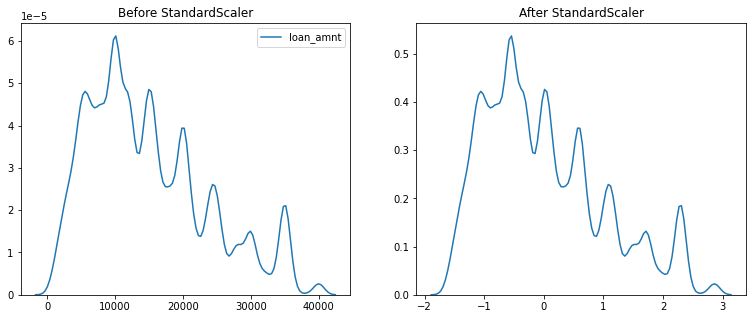

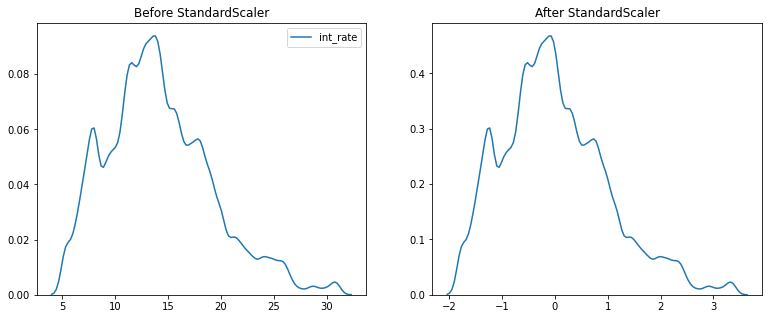

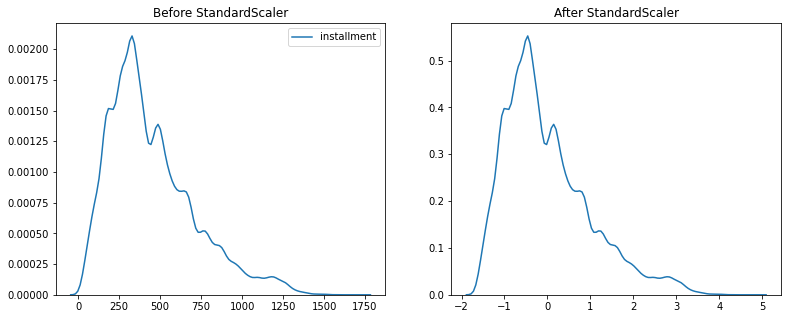

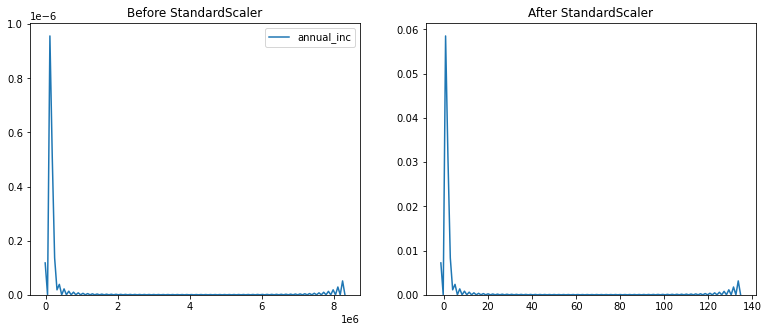

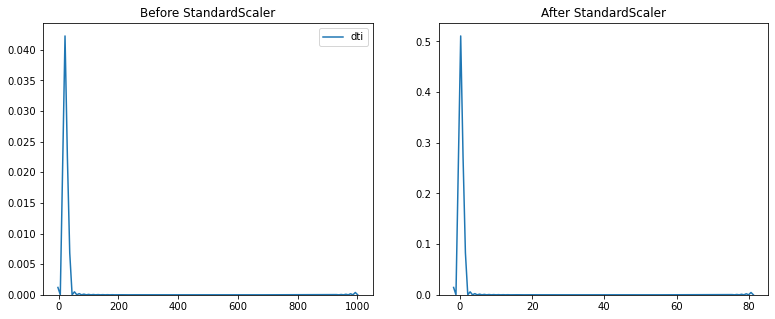

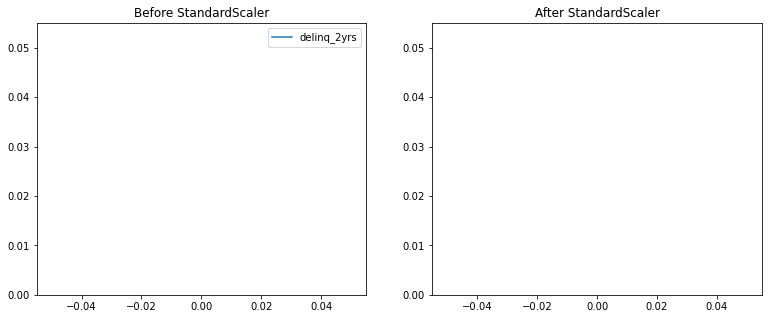

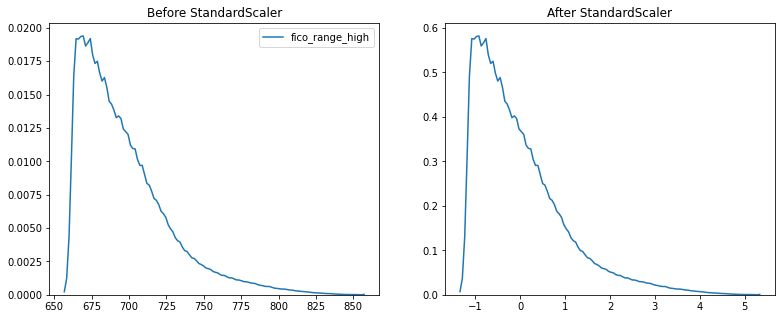

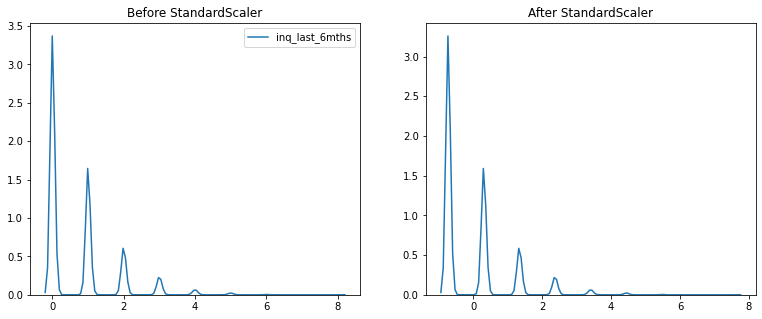

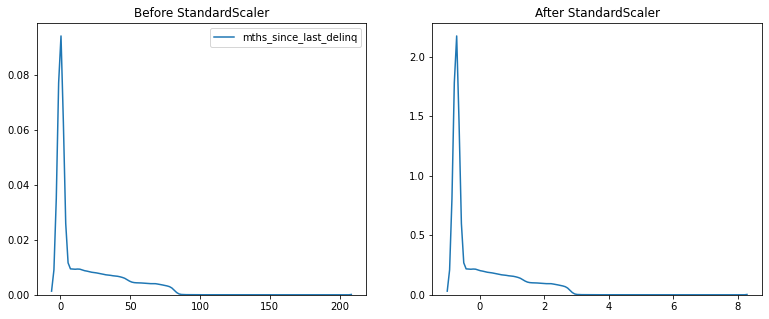

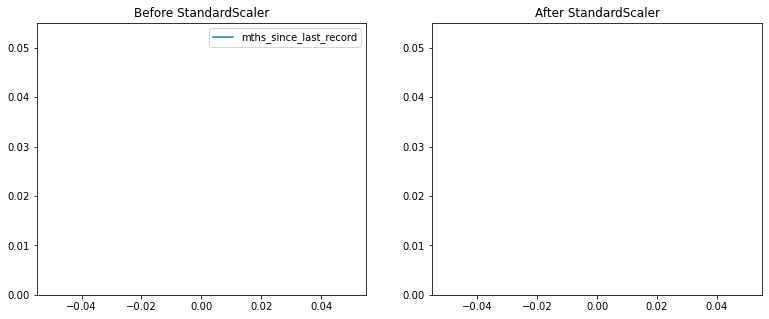

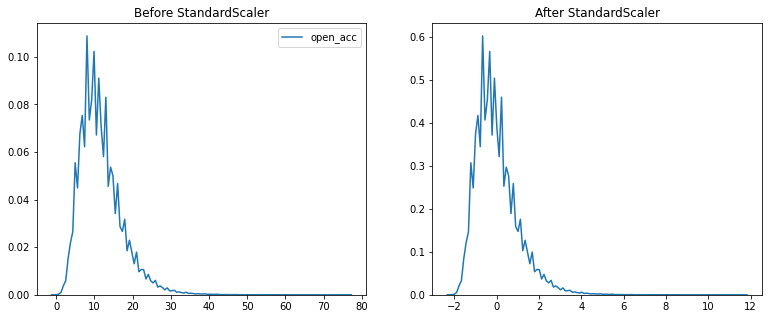

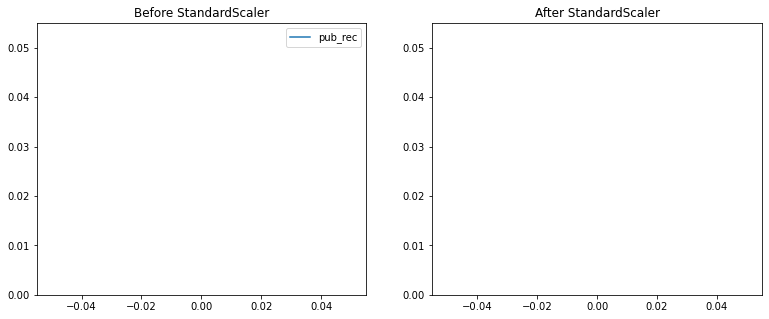

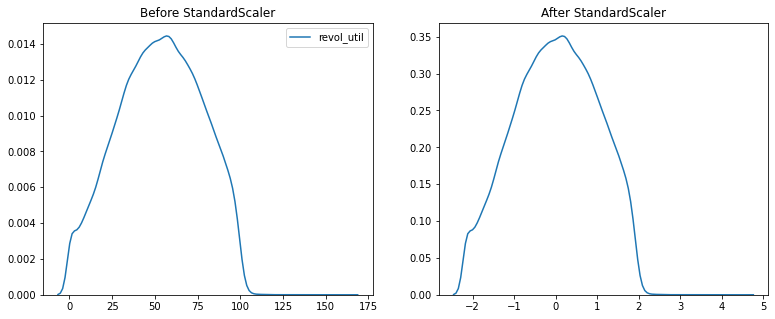

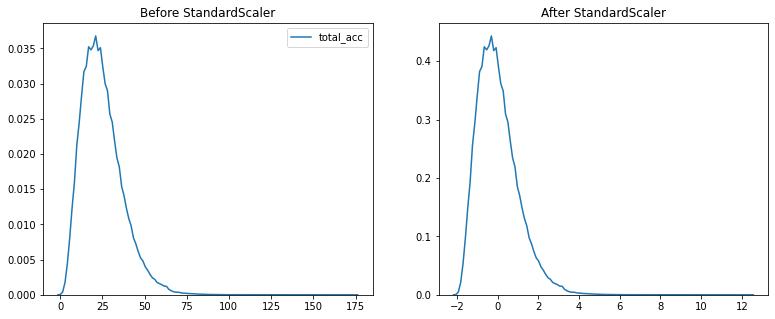

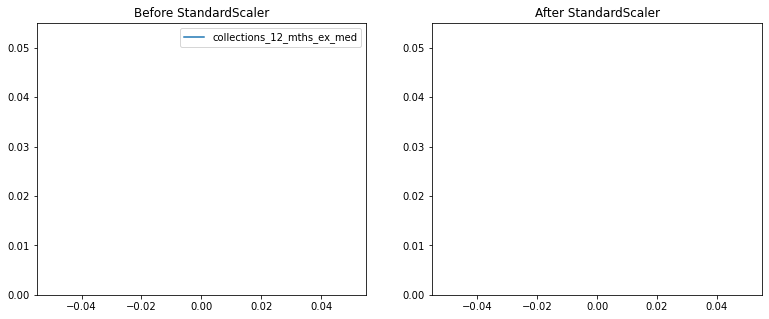

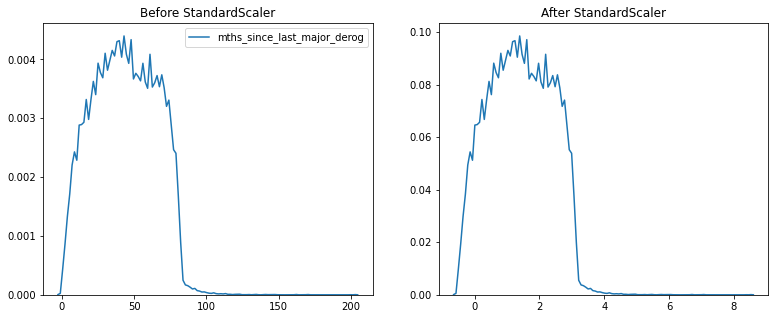

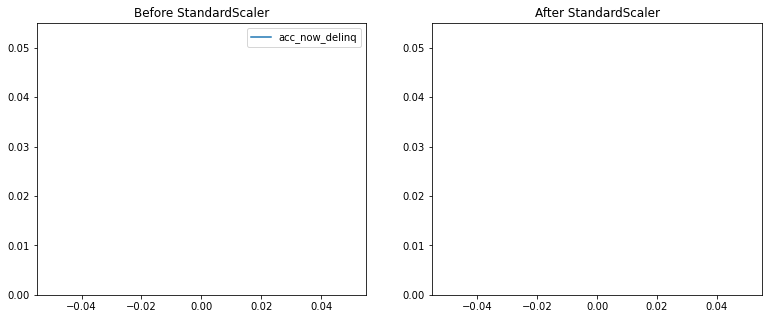

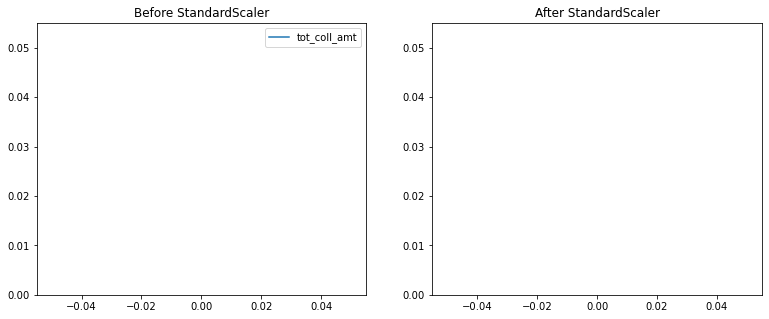

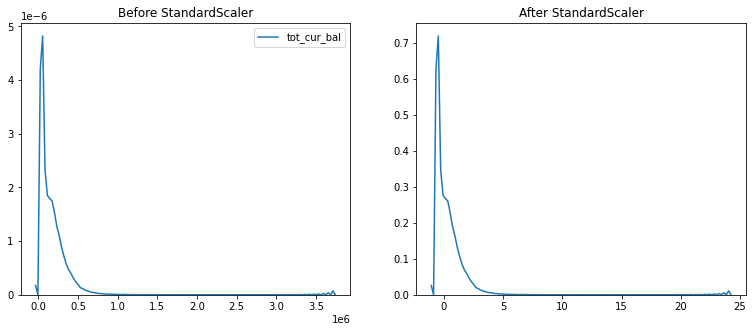

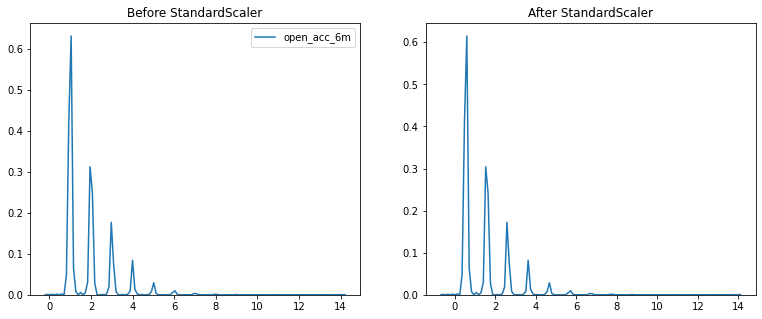

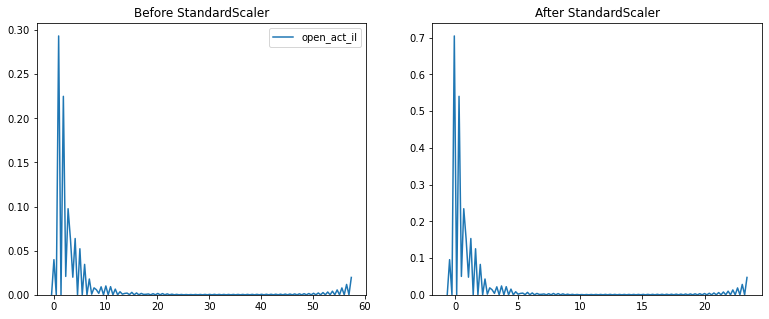

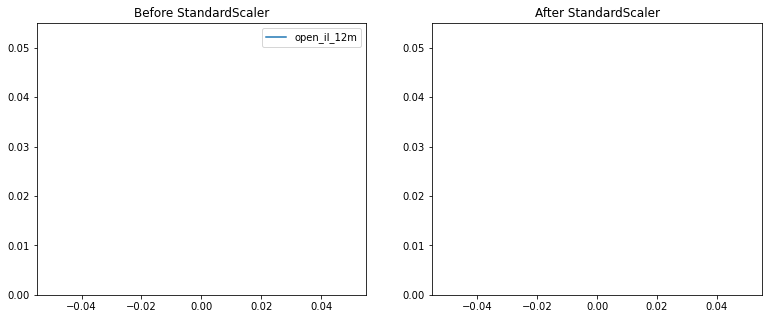

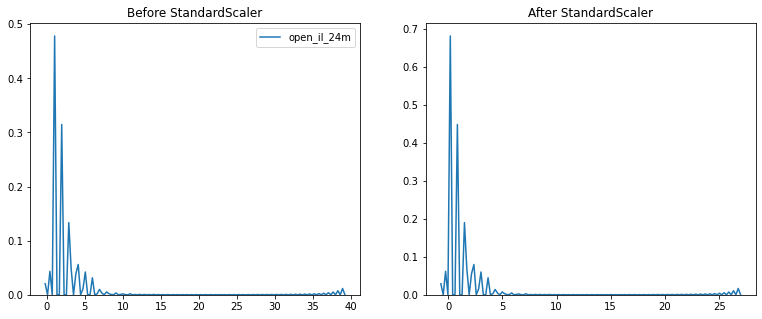

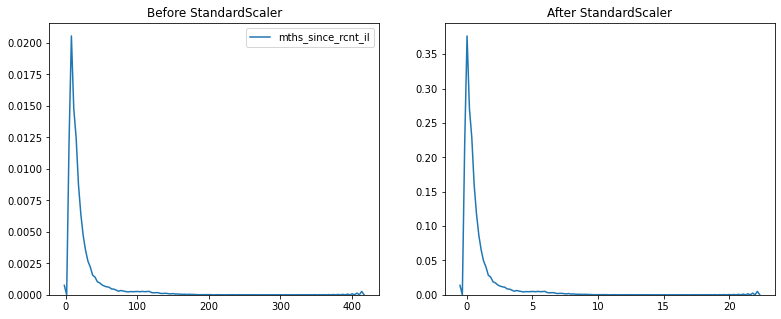

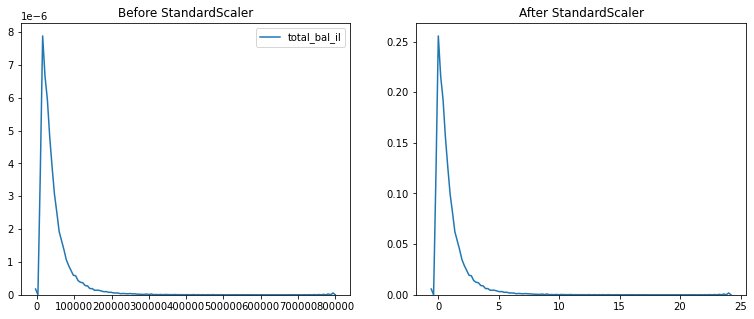

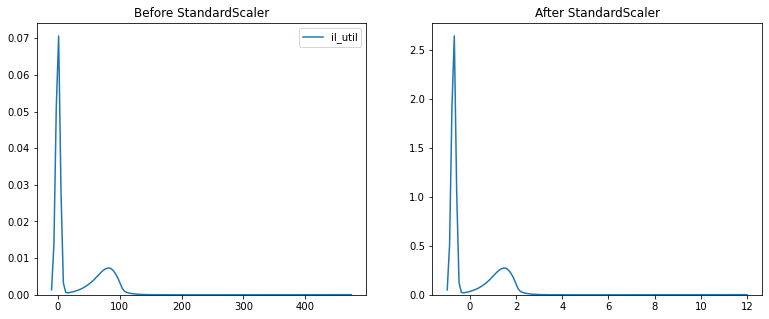

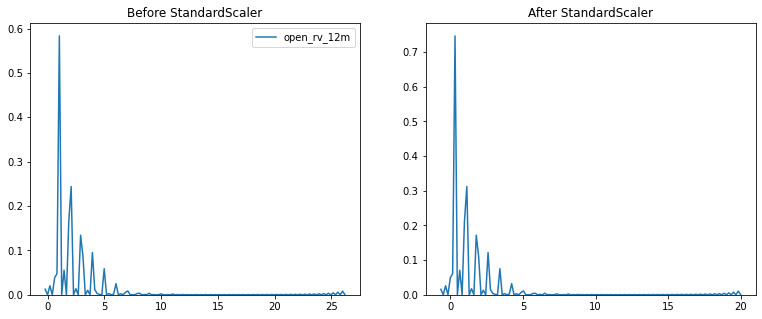

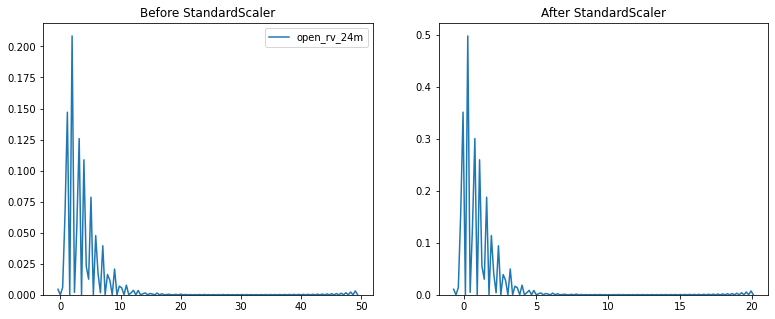

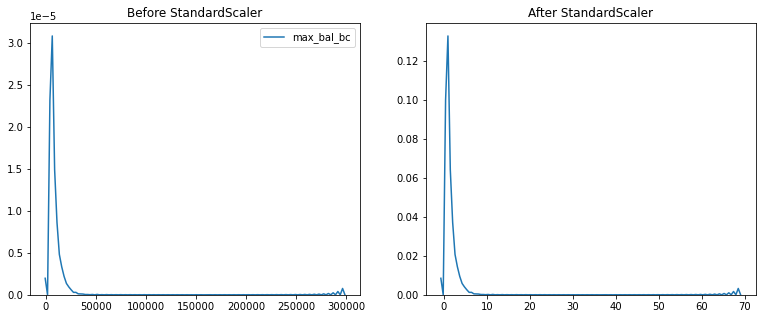

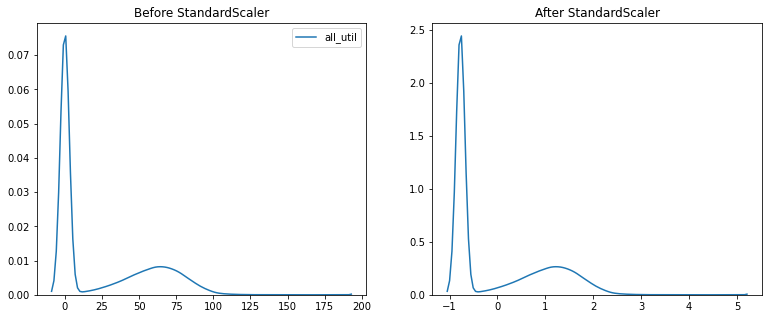

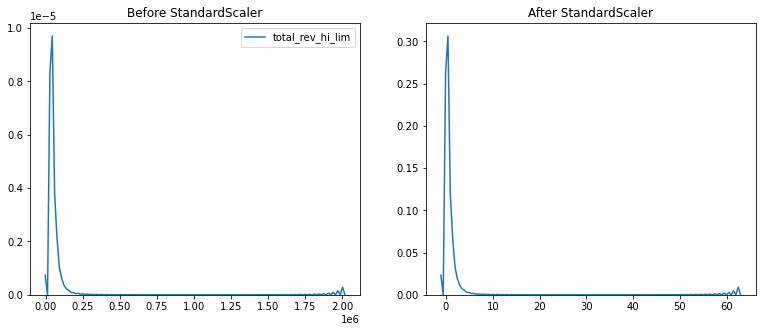

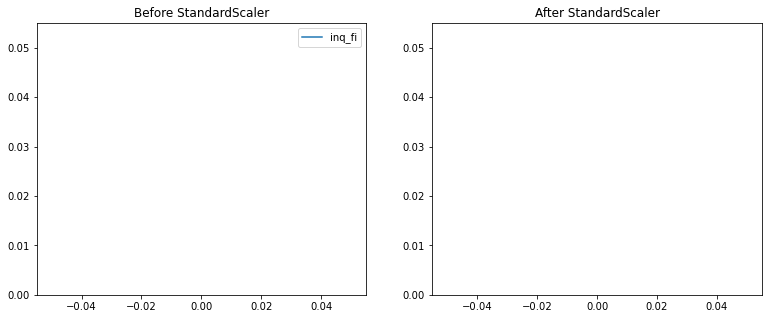

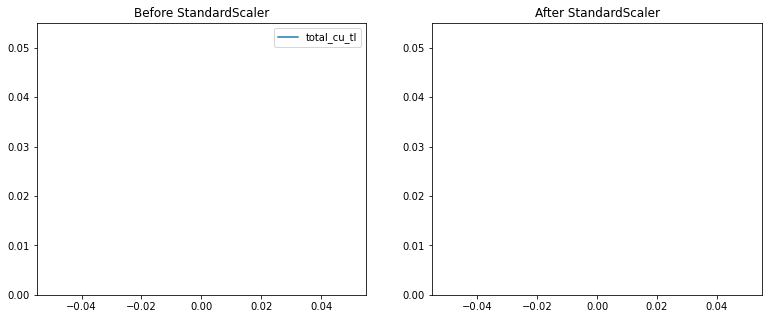

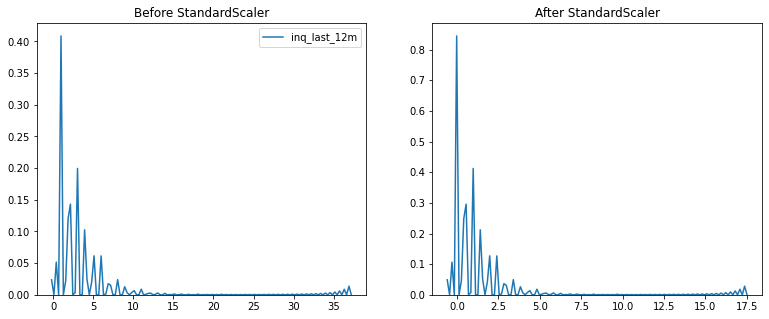

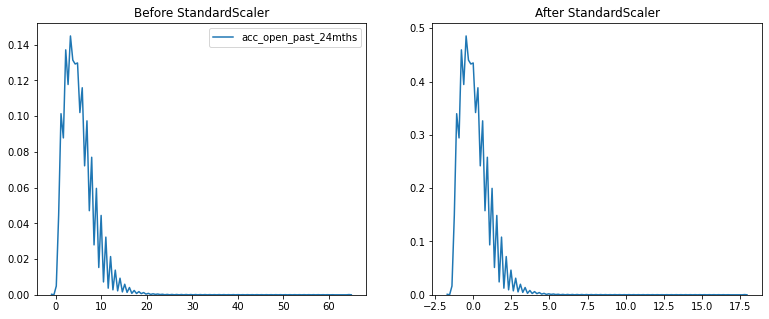

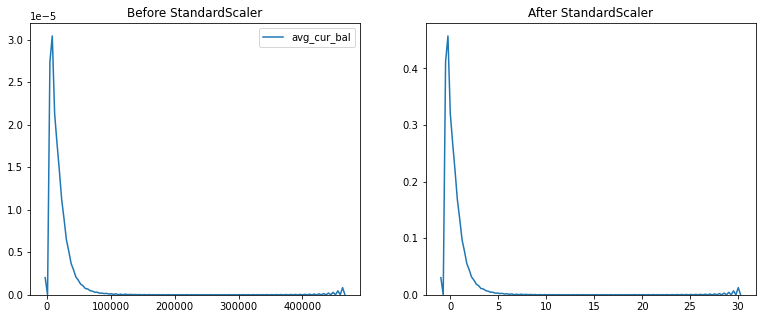

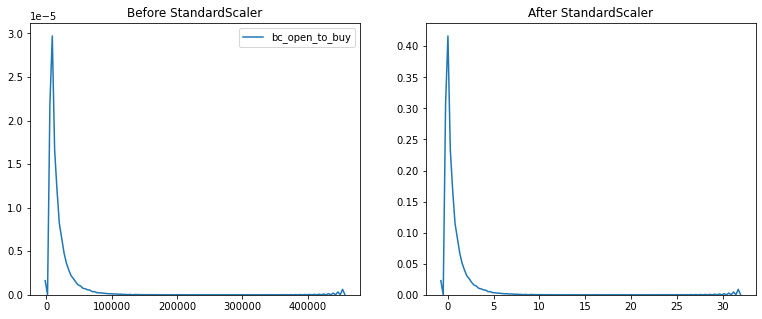

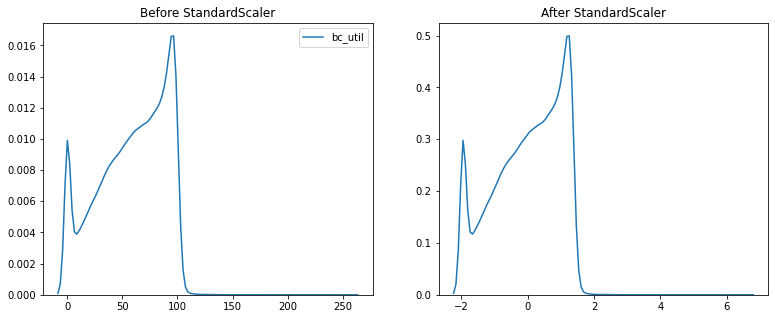

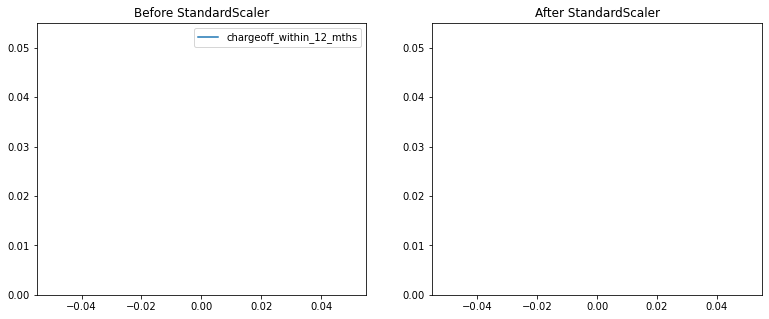

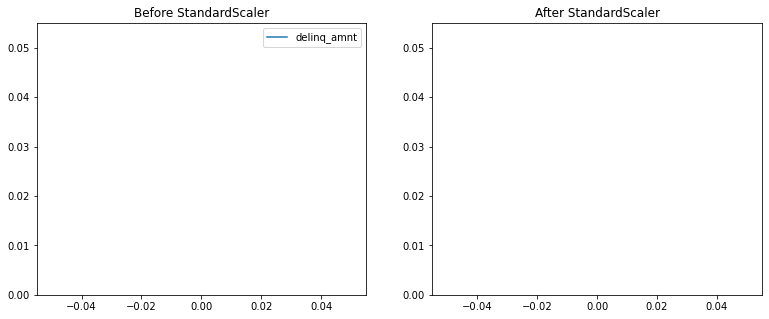

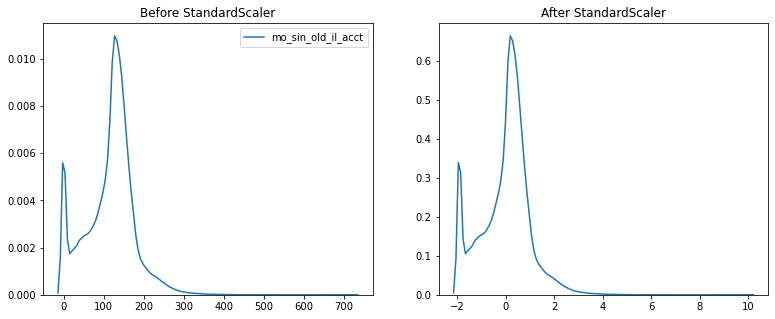

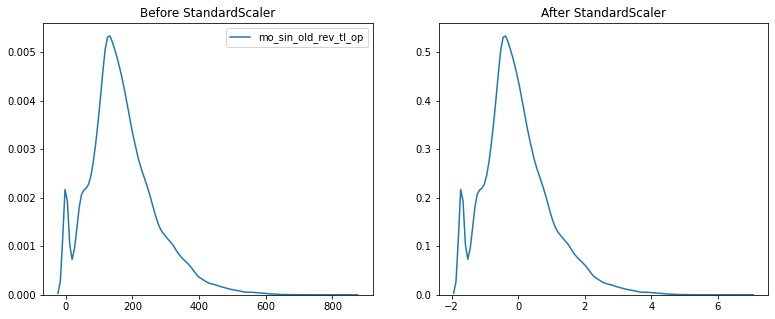

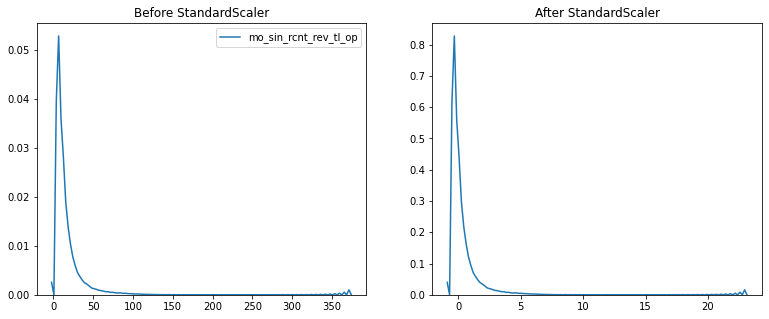

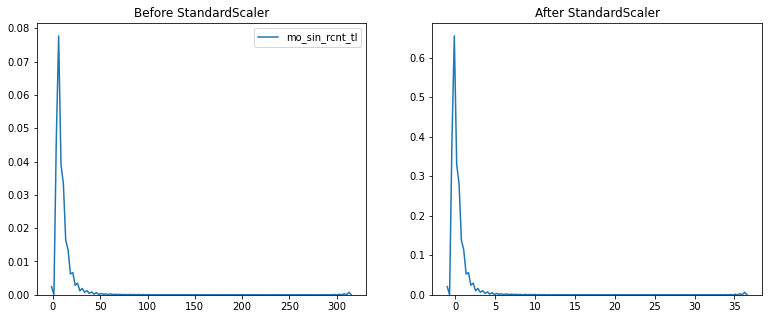

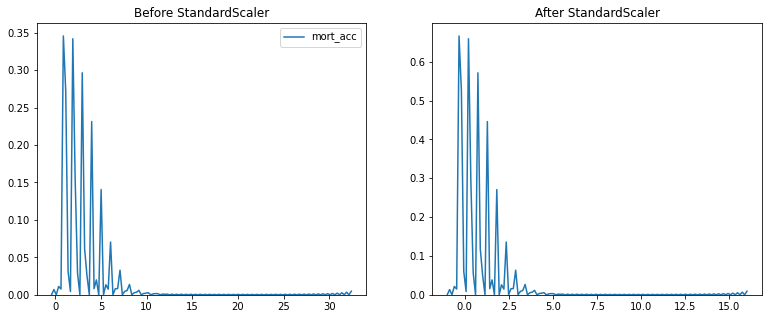

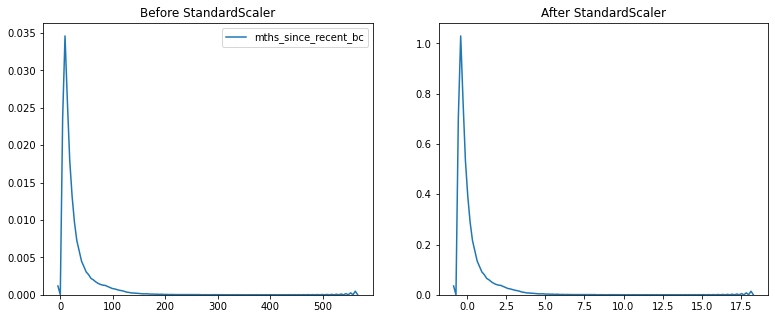

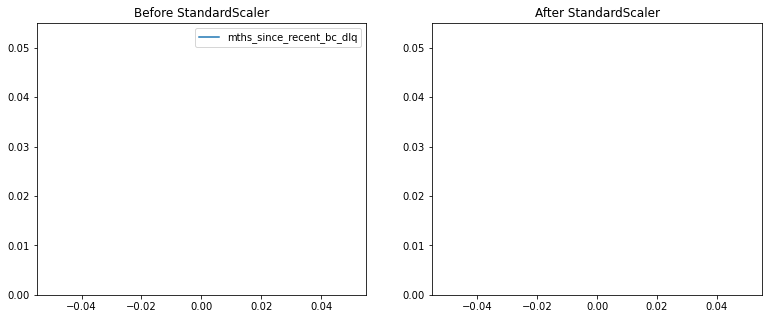

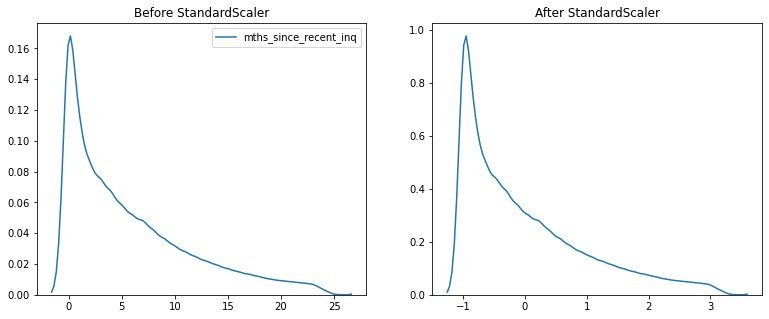

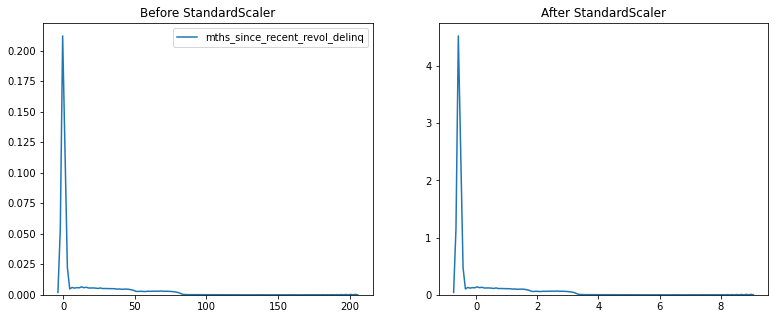

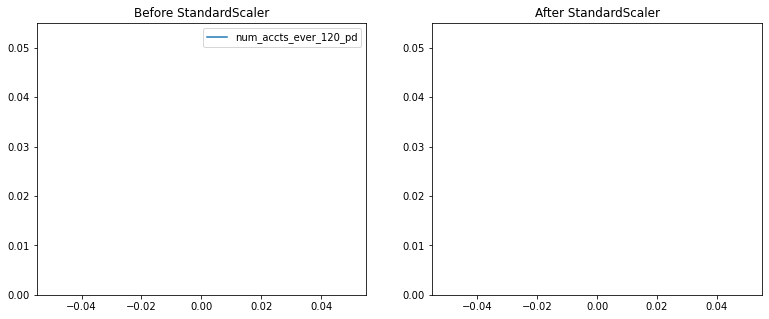

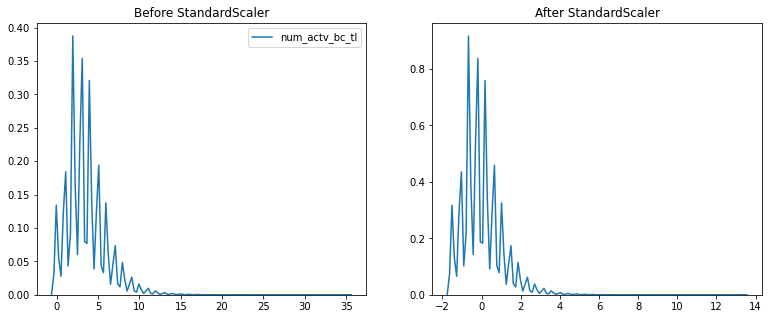

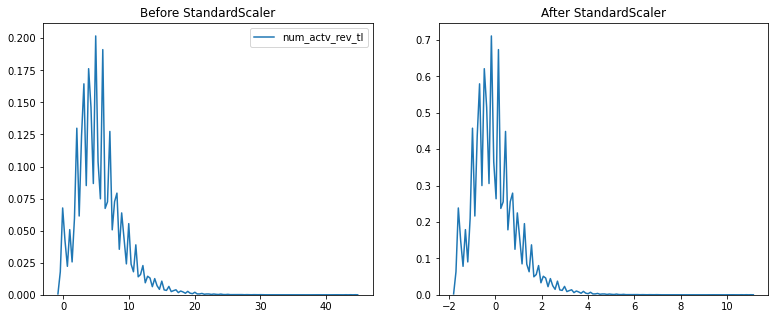

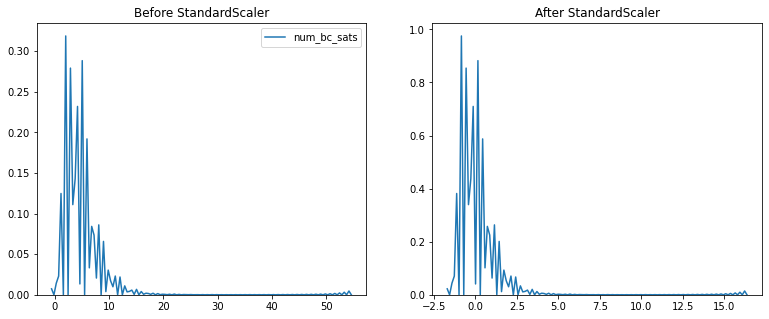

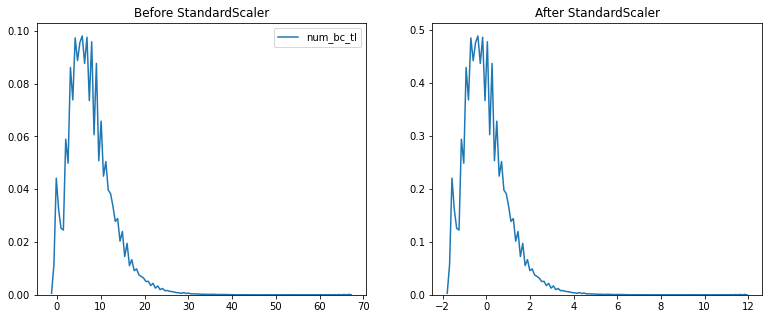

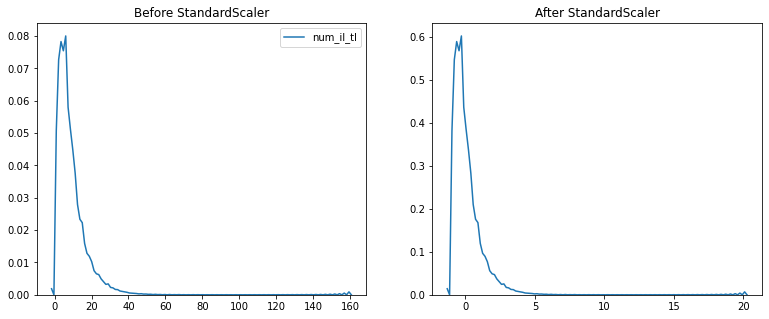

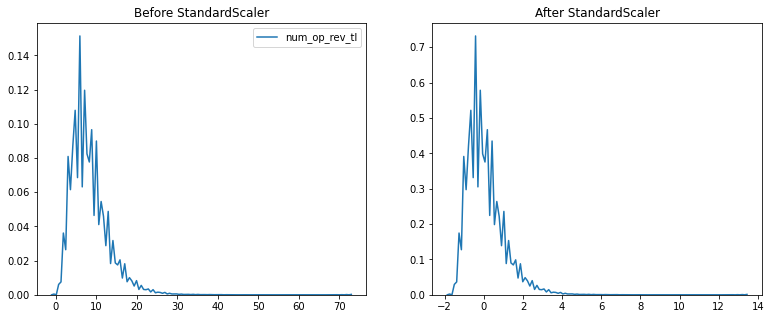

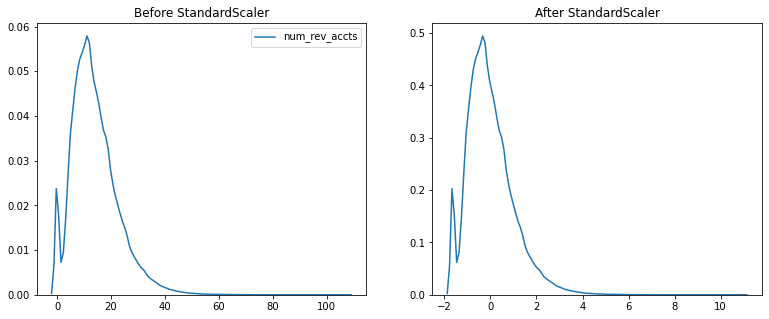

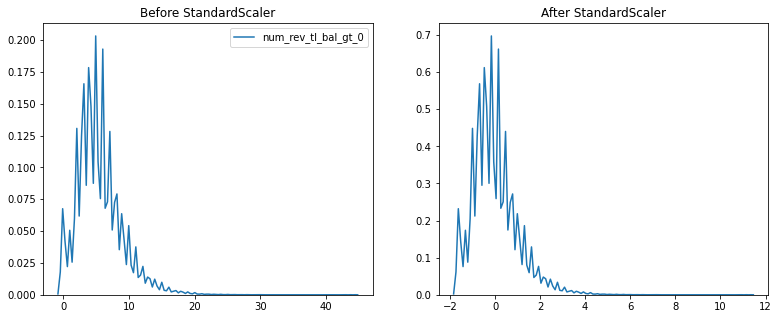

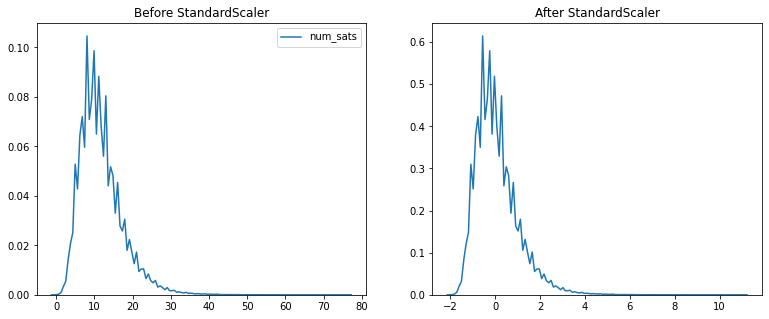

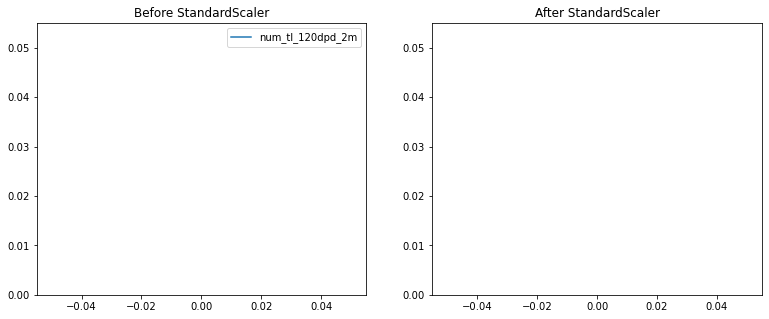

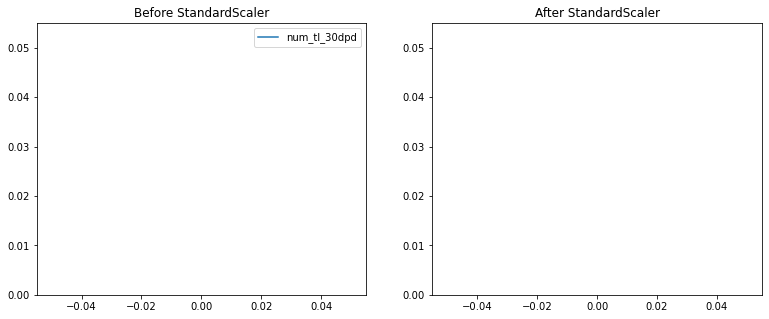

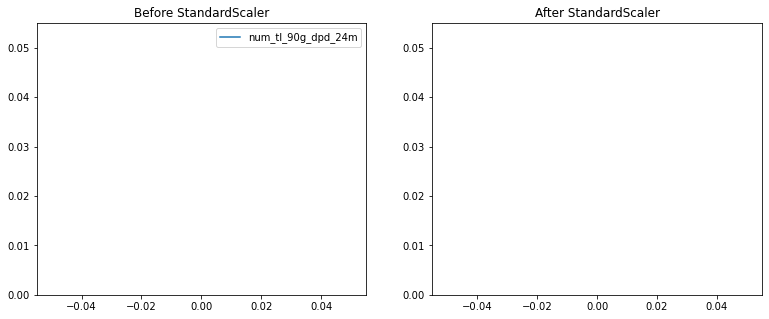

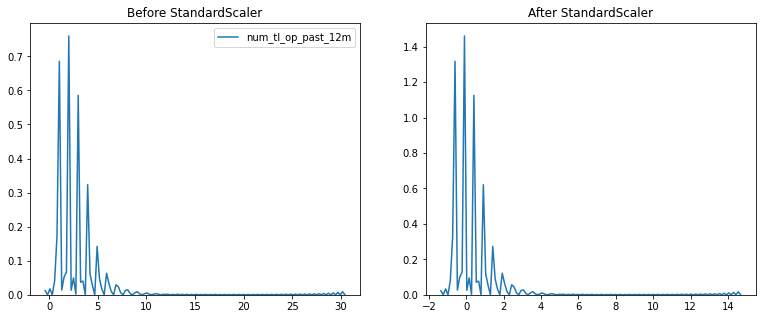

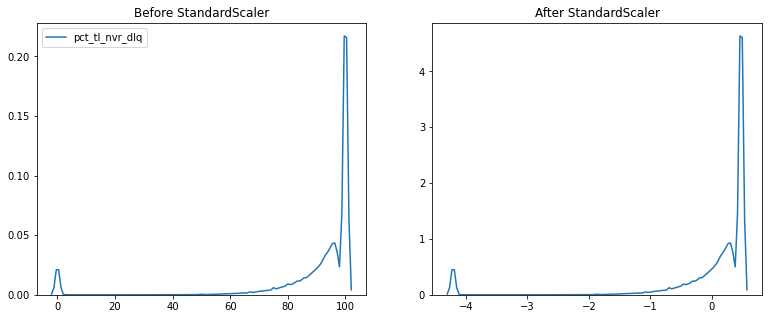

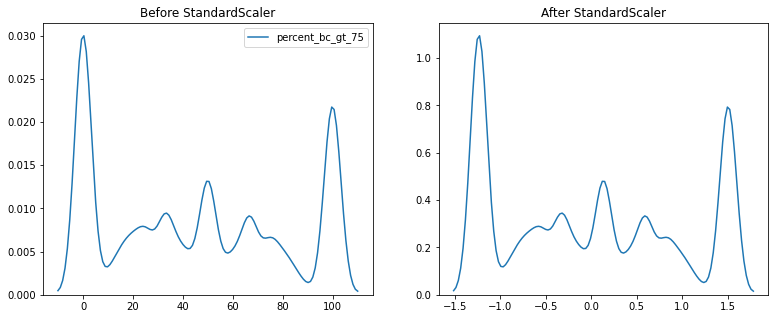

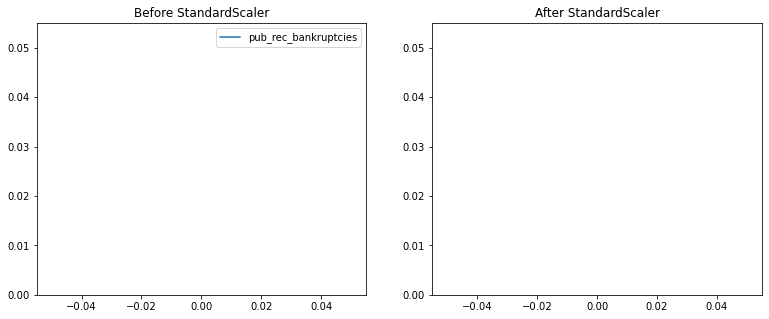

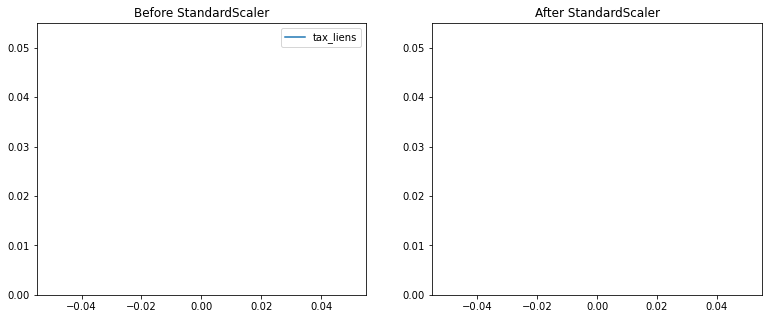

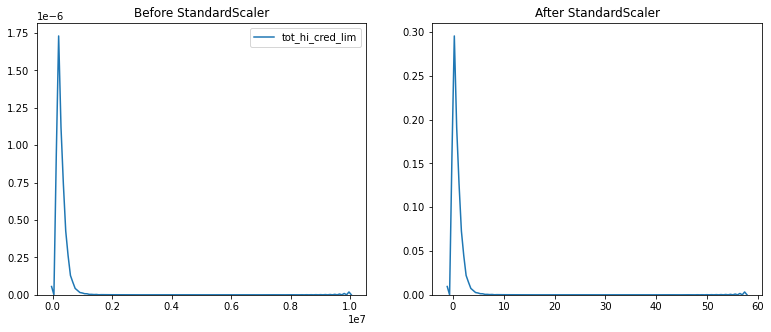

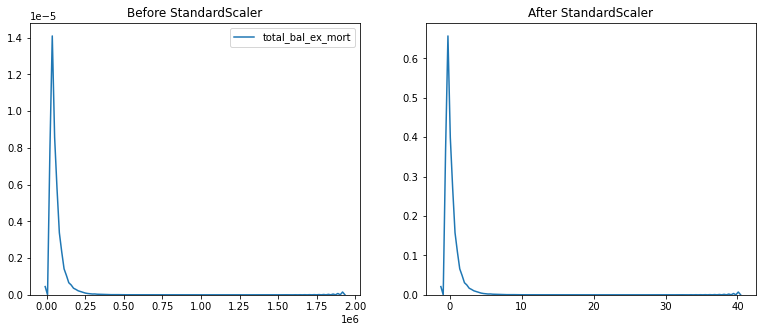

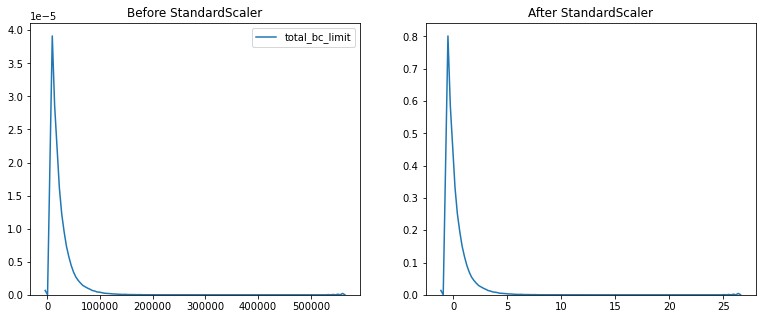

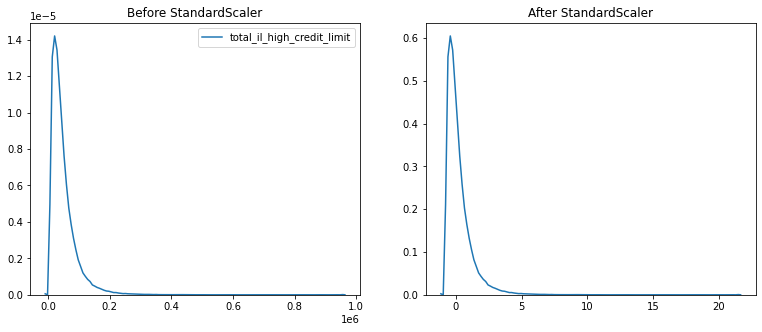

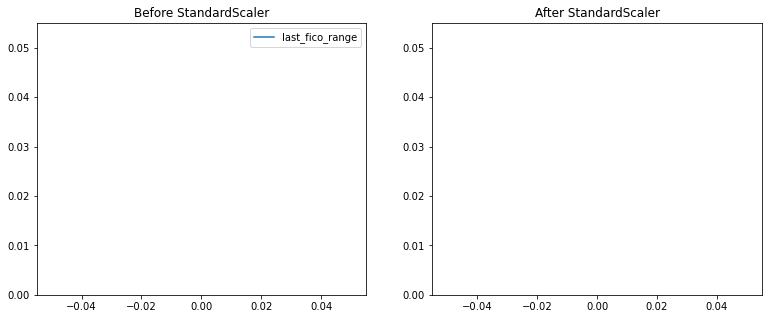

In [17]:
from sklearn.preprocessing import StandardScaler

for col in numeric_df.columns:
    plots(numeric_df, col, StandardScaler())

In [18]:
scaler = StandardScaler()

numeric_df_scaled = pd.DataFrame(StandardScaler().fit_transform(numeric_df))

numeric_df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,-1.001622,0.877128,-0.866418,-0.652986,1.021713,-0.366226,-0.268576,-0.72427,-0.743632,3.113401,-0.308677,1.221557,0.500260,-0.323342,6.394030,-0.531344,-0.067502,-0.016037,-0.249604,-0.475128,-0.489700,-0.439571,-0.525914,-0.423472,-0.461886,-0.700899,-0.487823,-0.554339,-0.523740,-0.770905,-0.652375,-0.400075,-0.333708,-0.490486,-0.234247,-0.198777,-0.447222,0.366680,-0.08453,-0.019871,0.500049,-0.420029,1.028882,0.693501,-0.264003,0.208684,-0.470903,0.565412,-0.567523,-0.379992,1.038852,0.410142,0.462403,0.264383,0.237553,-0.209495,-0.461379,0.437963,-0.223908,-0.026697,-0.054178,-0.173855,-1.142034,0.476902,1.049399,2.209473,-0.131202,-0.283690,-0.429783,-0.552442,-0.174229,-0.251301
1,-1.483144,1.005619,-1.450977,-1.018273,-0.935157,-0.366226,-0.268576,-0.72427,1.425236,-0.430593,-1.211043,-0.360480,-1.536551,-1.153499,-0.125805,1.699479,-0.067502,0.055793,-0.847858,-0.475128,-0.489700,-0.439571,-0.525914,-0.423472,-0.461886,-0.700899,-0.487823,-0.554339,-0.523740,-0.770905,-0.861405,-0.400075,-0.333708,-0.490486,-0.532665,-0.790071,-0.629498,-1.957665,-0.08453,-0.019871,-0.226274,1.312009,0.518214,1.523908,0.773656,-0.733006,-0.470903,2.456630,1.775631,0.382601,-1.497912,-0.724890,-1.499164,-1.539820,-0.958705,-0.623103,-0.812743,-0.727766,-1.075187,-0.026697,-0.054178,-0.173855,-1.142034,0.008304,-1.234785,-0.363099,-0.131202,-0.901662,-1.021532,-0.967495,-0.944873,-0.251301
2,-0.725245,-0.439906,-0.633906,-0.391460,-0.662221,-0.366226,-0.935121,-0.72427,-0.743632,-0.430593,-1.391516,-0.360480,1.002262,-1.651593,-0.125805,-0.531344,-0.067502,-0.018457,-0.697700,1.578152,-0.073392,-0.439571,0.175716,0.449553,-0.034826,1.439878,1.075155,0.281691,0.493808,1.677753,-0.579532,0.432548,0.173681,-0.490486,-0.532665,-0.415894,-0.477685,0.629374,-0.08453,-0.019871,-1.051643,-1.180925,-0.503123,-0.374166,-0.782832,-0.598479,-0.470903,1.768914,-0.567523,-0.379992,-0.652324,-0.724890,-0.845308,-1.138886,-0.825788,-1.036710,-1.281229,-0.727766,-1.245442,-0.026697,-0.054178,-0.173855,-0.101688,0.476902,0.136274,-0.363099,-0.131202,-0.748648,-0.541048,-0.498729,-0.540165,-0.251301
3,-0.654014,0.764698,-0.452563,0.098901,-1.435540,-0.366226,-0.601848,0.30950,-0.743632,-0.430593,-1.391516,-0.360480,0.372703,-1.651593,-0.125805,-0.531344,-0.067502,-0.018457,-0.828635,-0.475128,-0.489700,-0.439571,-0.525914,7.270059,-0.461886,-0.700899,-0.487823,0.281691,-0.049845,1.150827,-0.779060,-0.400075,-0.333708,0.477210,-0.831083,-0.740935,-0.527266,0.569520,-0.08453,-0.019871,0.417513,-1.371148,0.071379,0.693501,-0.782832,-0.295793,-0.470903,-0.981949,-0.567523,-0.379992,-0.229530,-0.441132,-0.518380,-0.938419,-0.958705,-0.829906,-1.164107,-0.727766,-1.245442,-0.026697,-0.054178,-0.173855,-1.142034,0.476902,0.594208,-0.363099,-0.131202,-0.886439,-0.960020,-0.757527,-0.944873,-0.251301
4,-1.172576,0.816898,-1.077387,-0.603950,-0.087401,0.736682,-0.768484,-0.72427,0.080538,-0.430593,-0.850096,-0.360480,1.216231,-0.489374,-0.125805,0.316369,-0.067502,-0.018457,1.644573,-0.475128,-0.489700,-0.439571,-0.525914,-0.423472,-0.461886,-0.700899,-0.487823,-0.554339,-0.523740,-0.770905,-0.617537,-0.400075,-0.333708,-0.490486,-0.234247,2.743975,-0.563650,1.045030,-0.08453,-0.019871,0.846704,0.190689,0.071379,0.693501,0.254827,-0.295793,-0.470903,1.253127,-0.567523,3.432973,-0.229530,-0.724890,-0.518380,0.264383,-0.161200,-0.829906,-0.461379,-0.727766,-0.734675,-0.026697,-0.054178,1.770794,-1.142034,-1.247537,1.507333,-0.363099,-0.131202,1.798799,-0.576577,-0.503612,-0.607448,-0.251301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [19]:
numeric_df_scaled.columns = numeric_df.columns

In [20]:
numeric_df_scaled

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,last_fico_range
0,-1.001622,0.877128,-0.866418,-0.652986,1.021713,-0.366226,-0.268576,-0.72427,-0.743632,3.113401,-0.308677,1.221557,0.500260,-0.323342,6.394030,-0.531344,-0.067502,-0.016037,-0.249604,-0.475128,-0.489700,-0.439571,-0.525914,-0.423472,-0.461886,-0.700899,-0.487823,-0.554339,-0.523740,-0.770905,-0.652375,-0.400075,-0.333708,-0.490486,-0.234247,-0.198777,-0.447222,0.366680,-0.08453,-0.019871,0.500049,-0.420029,1.028882,0.693501,-0.264003,0.208684,-0.470903,0.565412,-0.567523,-0.379992,1.038852,0.410142,0.462403,0.264383,0.237553,-0.209495,-0.461379,0.437963,-0.223908,-0.026697,-0.054178,-0.173855,-1.142034,0.476902,1.049399,2.209473,-0.131202,-0.283690,-0.429783,-0.552442,-0.174229,-0.251301
1,-1.483144,1.005619,-1.450977,-1.018273,-0.935157,-0.366226,-0.268576,-0.72427,1.425236,-0.430593,-1.211043,-0.360480,-1.536551,-1.153499,-0.125805,1.699479,-0.067502,0.055793,-0.847858,-0.475128,-0.489700,-0.439571,-0.525914,-0.423472,-0.461886,-0.700899,-0.487823,-0.554339,-0.523740,-0.770905,-0.861405,-0.400075,-0.333708,-0.490486,-0.532665,-0.790071,-0.629498,-1.957665,-0.08453,-0.019871,-0.226274,1.312009,0.518214,1.523908,0.773656,-0.733006,-0.470903,2.456630,1.775631,0.382601,-1.497912,-0.724890,-1.499164,-1.539820,-0.958705,-0.623103,-0.812743,-0.727766,-1.075187,-0.026697,-0.054178,-0.173855,-1.142034,0.008304,-1.234785,-0.363099,-0.131202,-0.901662,-1.021532,-0.967495,-0.944873,-0.251301
2,-0.725245,-0.439906,-0.633906,-0.391460,-0.662221,-0.366226,-0.935121,-0.72427,-0.743632,-0.430593,-1.391516,-0.360480,1.002262,-1.651593,-0.125805,-0.531344,-0.067502,-0.018457,-0.697700,1.578152,-0.073392,-0.439571,0.175716,0.449553,-0.034826,1.439878,1.075155,0.281691,0.493808,1.677753,-0.579532,0.432548,0.173681,-0.490486,-0.532665,-0.415894,-0.477685,0.629374,-0.08453,-0.019871,-1.051643,-1.180925,-0.503123,-0.374166,-0.782832,-0.598479,-0.470903,1.768914,-0.567523,-0.379992,-0.652324,-0.724890,-0.845308,-1.138886,-0.825788,-1.036710,-1.281229,-0.727766,-1.245442,-0.026697,-0.054178,-0.173855,-0.101688,0.476902,0.136274,-0.363099,-0.131202,-0.748648,-0.541048,-0.498729,-0.540165,-0.251301
3,-0.654014,0.764698,-0.452563,0.098901,-1.435540,-0.366226,-0.601848,0.30950,-0.743632,-0.430593,-1.391516,-0.360480,0.372703,-1.651593,-0.125805,-0.531344,-0.067502,-0.018457,-0.828635,-0.475128,-0.489700,-0.439571,-0.525914,7.270059,-0.461886,-0.700899,-0.487823,0.281691,-0.049845,1.150827,-0.779060,-0.400075,-0.333708,0.477210,-0.831083,-0.740935,-0.527266,0.569520,-0.08453,-0.019871,0.417513,-1.371148,0.071379,0.693501,-0.782832,-0.295793,-0.470903,-0.981949,-0.567523,-0.379992,-0.229530,-0.441132,-0.518380,-0.938419,-0.958705,-0.829906,-1.164107,-0.727766,-1.245442,-0.026697,-0.054178,-0.173855,-1.142034,0.476902,0.594208,-0.363099,-0.131202,-0.886439,-0.960020,-0.757527,-0.944873,-0.251301
4,-1.172576,0.816898,-1.077387,-0.603950,-0.087401,0.736682,-0.768484,-0.72427,0.080538,-

In [21]:
catagorical_dummy_df.index

Int64Index([1775844,  122162, 1115151, 2166346,  124850,  320707,  358338,
             314421, 1143742,  654700,
            ...
             195313,  631246, 1777173,  702096, 1215148, 1115916,  682988,
             950338, 1966984,  276631],
           dtype='int64', name='Loan ID', length=199940)

In [22]:
numeric_df_scaled['Loan ID'] = catagorical_dummy_df.index

numeric_df_scaled.set_index('Loan ID', inplace=True)

numeric_df_scaled

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,last_fico_range
Loan ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1775844,-1.001622,0.877128,-0.866418,-0.652986,1.021713,-0.366226,-0.268576,-0.72427,-0.743632,3.113401,-0.308677,1.221557,0.500260,-0.323342,6.394030,-0.531344,-0.067502,-0.016037,-0.249604,-0.475128,-0.489700,-0.439571,-0.525914,-0.423472,-0.461886,-0.700899,-0.487823,-0.554339,-0.523740,-0.770905,-0.652375,-0.400075,-0.333708,-0.490486,-0.234247,-0.198777,-0.447222,0.366680,-0.08453,-0.019871,0.500049,-0.420029,1.028882,0.693501,-0.264003,0.208684,-0.470903,0.565412,-0.567523,-0.379992,1.038852,0.410142,0.462403,0.264383,0.237553,-0.209495,-0.461379,0.437963,-0.223908,-0.026697,-0.054178,-0.173855,-1.142034,0.476902,1.049399,2.209473,-0.131202,-0.283690,-0.429783,-0.552442,-0.174229,-0.251301
122162,-1.483144,1.005619,-1.450977,-1.018273,-0.935157,-0.366226,-0.268576,-0.72427,1.425236,-0.430593,-1.211043,-0.360480,-1.536551,-1.153499,-0.125805,1.699479,-0.067502,0.055793,-0.847858,-0.475128,-0.489700,-0.439571,-0.525914,-0.423472,-0.461886,-0.700899,-0.487823,-0.554339,-0.523740,-0.770905,-0.861405,-0.400075,-0.333708,-0.490486,-0.532665,-0.790071,-0.629498,-1.957665,-0.08453,-0.019871,-0.226274,1.312009,0.518214,1.523908,0.773656,-0.733006,-0.470903,2.456630,1.775631,0.382601,-1.497912,-0.724890,-1.499164,-1.539820,-0.958705,-0.623103,-0.812743,-0.727766,-1.075187,-0.026697,-0.054178,-0.173855,-1.142034,0.008304,-1.234785,-0.363099,-0.131202,-0.901662,-1.021532,-0.967495,-0.944873,-0.251301
1115151,-0.725245,-0.439906,-0.633906,-0.391460,-0.662221,-0.366226,-0.935121,-0.72427,-0.743632,-0.430593,-1.391516,-0.360480,1.002262,-1.651593,-0.125805,-0.531344,-0.067502,-0.018457,-0.697700,1.578152,-0.073392,-0.439571,0.175716,0.449553,-0.034826,1.439878,1.075155,0.281691,0.493808,1.677753,-0.579532,0.432548,0.173681,-0.490486,-0.532665,-0.415894,-0.477685,0.629374,-0.08453,-0.019871,-1.051643,-1.180925,-0.503123,-0.374166,-0.782832,-0.598479,-0.470903,1.768914,-0.567523,-0.379992,-0.652324,-0.724890,-0.845308,-1.138886,-0.825788,-1.036710,-1.281229,-0.727766,-1.245442,-0.026697,-0.054178,-0.173855,-0.101688,0.476902,0.136274,-0.363099,-0.131202,-0.748648,-0.541048,-0.498729,-0.540165,-0.251301
2166346,-0.654014,0.764698,-0.452563,0.098901,-1.435540,-0.366226,-0.601848,0.30950,-0.743632,-0.430593,-1.391516,-0.360480,0.372703,-1.651593,-0.125805,-0.531344,-0.067502,-0.018457,-0.828635,-0.475128,-0.489700,-0.439571,-0.525914,7.270059,-0.461886,-0.700899,-0.487823,0.281691,-0.049845,1.150827,-0.779060,-0.400075,-0.333708,0.477210,-0.831083,-0.740935,-0.527266,0.569520,-0.08453,-0.019871,0.417513,-1.371148,0.071379,0.693501,-0.782832,-0.295793,-0.470903,-0.981949,-0.567523,-0.379992,-0.229530,-0.441132,-0.518380,-0.938419,-0.958705,-0.829906,-1.164107,-0.727766,-1.245442,-0.026697,-0.054178,-0.173855,-1.142034,0.476902,0.594208,-0.363099,-0.131202,-0.886439,-0.960020,-0.757527,-0.944

# Combine object and numeric dataframes

In [23]:
X = catagorical_dummy_df.merge(numeric_df_scaled, on='Loan ID')

X

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_Uknown,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,...,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,last_fico_range
Loan ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1775844,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.500260,-0.323342,6.394030,-0.531344,-0.067502,-0.016037,-0.249604,-0.475128,-0.489700,-0.439571,-0.525914,-0.423472,-0.461886,-0.700899,-0.487823,-0.554339,-0.523740,-0.770905,-0.652375,-0.400075,-0.333708,-0.490486,-0.234247,-0.198777,-0.447222,0.366680,-0.08453,-0.019871,0.500049,-0.420029,1.028882,0.693501,-0.264003,0.208684,-0.470903,0.565412,-0.567523,-0.379992,1.038852,0.410142,0.462403,0.264383,0.237553,-0.209495,-0.461379,0.437963,-0.223908,-0.026697,-0.054178,-0.173855,-1.142034,0.476902,1.049399,2.209473,-0.131202,-0.283690,-0.429783,-0.552442,-0.174229,-0.251301
122162,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1.536551,-1.153499,-0.125805,1.699479,-0.067502,0.055793,-0.847858,-0.475128,-0.489700,-0.439571,-0.525914,-0.423472,-0.461886,-0.700899,-0.487823,-0.554339,-0.523740,-0.770905,-0.861405,-0.400075,-0.333708,-0.490486,-0.532665,-0.790071,-0.629498,-1.957665,-0.08453,-0.019871,-0.226274,1.312009,0.518214,1.523908,0.773656,-0.733006,-0.470903,2.456630,1.775631,0.382601,-1.497912,-0.724890,-1.499164,-1.539820,-0.958705,-0.623103,-0.812743,-0.727766,-1.075187,-0.026697,-0.054178,-0.173855,-1.142034,0.008304,-1.234785,-0.363099,-0.131202,-0.901662,-1.021532,-0.967495,-0.944873,-0.251301
1115151,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1.002262,-1.651593,-0.125805,-0.531344,-0.067502,-0.018457,-0.697700,1.578152,-0.073392,-0.439571,0.175716,0.449553,-0.034826,1.439878,1.075155,0.281691,0.493808,1.677753,-0.579532,0.432548,0.173681,-0.490486,-0.532665,-0.415894,-0.477685,0.629374,-0.08453,-0.019871,-1.051643,-1.180925,-0.503123,-0.374166,-0.782832,-0.598479,-0.4

# Split into train and test dataframes

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


(139958, 172)
(59982, 172)
(139958, 1)
(59982, 1)


In [26]:
X_train.to_csv('X_train.csv', index=True)

X_test.to_csv('X_test.csv', index=True)

y_train.to_csv('y_train.csv', index=True)

y_test.to_csv('y_test.csv', index=True)